Mounting Google Drive to access dataset and save created model

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Library Installation

In [2]:
!pip install tensorflow-text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.6 MB 4.0 MB/s 
     |████████████████████████████████| 511.7 MB 5.0 kB/s 
     |████████████████████████████████| 438 kB 76.6 MB/s 
     |████████████████████████████████| 1.6 MB 58.3 MB/s 
     |████████████████████████████████| 5.8 MB 58.8 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninst

Importing various necessary libraries

In [7]:
import tensorflow_text as text
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
from sklearn import preprocessing
import keras
import tensorflow_hub as hub


Read the csv data file

In [ ]:
# Read the tsv data file
df = pd.read_csv('/content/drive/MyDrive/FinalCleanData.csv')
#print(df)
df=pd.DataFrame(df)

Custom for loop to extract image path from Google Drive location

In [ ]:
old_filelength=38520
train_split_val = 29699    #This value is 80% of entire dataset length 
FilePath_arr=[]
img_number_arr=[]
for i in range(0,len(df)):
    if((i <= train_split_val) & (df.iat[i,5] == 0)):
        FilePath_arr.append('/content/drive/MyDrive/images_resized/train_resized/fake_resized/image-' + str(df.iat[i,1]) + '.jpg')
        img_number_arr.append(df.iat[i,1])
    elif((i <= train_split_val) & (df.iat[i,5] == 1)):
        FilePath_arr.append('/content/drive/MyDrive/images_resized/train_resized/true_resized/image-' + str(df.iat[i,1]) + '.jpg')
        img_number_arr.append(df.iat[i,1])
    elif((i > train_split_val) & (df.iat[i,5] == 0)):
        FilePath_arr.append('/content/drive/MyDrive/images_resized/test_resized/fake_resized/image-' + str(df.iat[i,1]) + '.jpg')
        img_number_arr.append(df.iat[i,1])
    elif((i > train_split_val) & (df.iat[i,5] == 1)):
        FilePath_arr.append('/content/drive/MyDrive/images_resized/test_resized/true_resized/image-' + str(df.iat[i,1]) + '.jpg')
        img_number_arr.append(df.iat[i,1])


Creating new dataframe which includes the image path on google drive. This is created using the array generated in the above code.

In [ ]:
import pandas as pd
import numpy as np
image_number = np.array(img_number_arr)
Path = np.array(FilePath_arr)
new_df = pd.DataFrame({'image_number': image_number, 'Path': Path}, columns=['image_number', 'Path'])
print(new_df)

       image_number                                               Path
0                 0  /content/drive/MyDrive/images_resized/train_re...
1                 1  /content/drive/MyDrive/images_resized/train_re...
2                 2  /content/drive/MyDrive/images_resized/train_re...
3                 3  /content/drive/MyDrive/images_resized/train_re...
4                 4  /content/drive/MyDrive/images_resized/train_re...
...             ...                                                ...
37108         38515  /content/drive/MyDrive/images_resized/test_res...
37109         38516  /content/drive/MyDrive/images_resized/test_res...
37110         38517  /content/drive/MyDrive/images_resized/test_res...
37111         38518  /content/drive/MyDrive/images_resized/test_res...
37112         38519  /content/drive/MyDrive/images_resized/test_res...

[37113 rows x 2 columns]


Inner joining the new_df with merged_df using the key 'image_number' to obtain a final dataframe.

In [ ]:
merged_df=pd.merge(left=new_df, right=df, on='image_number', how='inner')
print(merged_df)
#merged_df.to_csv('/content/drive/MyDrive/MergedData.csv')

       image_number                                               Path  index  \
0                 0  /content/drive/MyDrive/images_resized/train_re...      0   
1                 1  /content/drive/MyDrive/images_resized/train_re...      1   
2                 2  /content/drive/MyDrive/images_resized/train_re...      2   
3                 3  /content/drive/MyDrive/images_resized/train_re...      3   
4                 4  /content/drive/MyDrive/images_resized/train_re...      4   
...             ...                                                ...    ...   
37108         38515  /content/drive/MyDrive/images_resized/test_res...  37108   
37109         38516  /content/drive/MyDrive/images_resized/test_res...  37109   
37110         38517  /content/drive/MyDrive/images_resized/test_res...  37110   
37111         38518  /content/drive/MyDrive/images_resized/test_res...  37111   
37112         38519  /content/drive/MyDrive/images_resized/test_res...  37112   

                 domain    

Porter Stemming implementation to obtain clean pre-processed news text.

In [ ]:
#Importing necessary libraries

from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras import layers

voc_size=10000

import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')


#News text is cleaned using regular expression which removes special characters from the text.
#Porter Stemming is used to remove stop words from the text to simplify it for the model.

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(merged_df)):
    print(i)
    news = re.sub('[^a-zA-Z0-9]', ' ', merged_df.iat[i,5])
    news = news.lower()
    news = news.split()
    
    news = [ps.stem(word) for word in news if not word in stopwords.words('english')]
    news = ' '.join(news)
    corpus.append(news)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Streaming output truncated to the last 5000 lines.
32113
32114
32115
32116
32117
32118
32119
32120
32121
32122
32123
32124
32125
32126
32127
32128
32129
32130
32131
32132
32133
32134
32135
32136
32137
32138
32139
32140
32141
32142
32143
32144
32145
32146
32147
32148
32149
32150
32151
32152
32153
32154
32155
32156
32157
32158
32159
32160
32161
32162
32163
32164
32165
32166
32167
32168
32169
32170
32171
32172
32173
32174
32175
32176
32177
32178
32179
32180
32181
32182
32183
32184
32185
32186
32187
32188
32189
32190
32191
32192
32193
32194
32195
32196
32197
32198
32199
32200
32201
32202
32203
32204
32205
32206
32207
32208
32209
32210
32211
32212
32213
32214
32215
32216
32217
32218
32219
32220
32221
32222
32223
32224
32225
32226
32227
32228
32229
32230
32231
32232
32233
32234
32235
32236
32237
32238
32239
32240
32241
32242
32243
32244
32245
32246
32247
32248
32249
32250
32251
32252
32253
32254
32255
32256
32257
32258
32259
32260
32261
32262
32263
32264
32265
32266
32267
32268
32269
32270
3

Saving Final Data Frame on Google Drive

In [ ]:
merged_df['preprocessed_newsText']=pd.Series(corpus)
merged_df.head()
#merged_df.to_csv('/content/drive/MyDrive/FinalProcessed_MergedData.csv')

,image_number,Path,index,domain,img_url,news_title,is_fake,preprocessed_newsText
0,0,/content/drive/MyDrive/images_resized/train_re...,0,i.redd.it,https://preview.redd.it/l0ga0tug17k31.jpg?widt...,My Xbox controller says hi,1,xbox control say hi
1,1,/content/drive/MyDrive/images_resized/train_re...,1,i.imgur.com,https://external-preview.redd.it/VX7bXDu9Gl8UZ...,PsBattle: New image from The Mandalorian,1,psbattl new imag mandalorian
2,2,/content/drive/MyDrive/images_resized/train_re...,2,i.redd.it,https://preview.redd.it/bxp58zf01zy21.jpg?widt...,This tree I found with a solo cup on it,1,tree found solo cup
3,3,/content/drive/MyDrive/images_resized/train_re...,3,i.redd.it,https://preview.redd.it/ipfrolruml411.jpg?widt...,"Dude, I'd feel the same if I got a pole throug...",0,dude feel got pole head
4,4,/content/drive/MyDrive/images_resized/train_re...,4,i.imgur.com,https://external-preview.redd.it/FPz_jid8GIOdf...,PsBattle: Japanese Black Pine tree,1,psbattl japanes black pine tree


Reading Final Data Frame

In [3]:
import pandas as pd
import numpy as np

df_final = pd.read_csv('/content/drive/MyDrive/FinalProcessed_MergedData.csv')
print(df_final.head())

   Unnamed: 0  image_number  \
0           0             0   
1           1             1   
2           2             2   
3           3             3   
4           4             4   

                                                Path  index       domain  \
0  /content/drive/MyDrive/images_resized/train_re...      0    i.redd.it   
1  /content/drive/MyDrive/images_resized/train_re...      1  i.imgur.com   
2  /content/drive/MyDrive/images_resized/train_re...      2    i.redd.it   
3  /content/drive/MyDrive/images_resized/train_re...      3    i.redd.it   
4  /content/drive/MyDrive/images_resized/train_re...      4  i.imgur.com   

                                             img_url  \
0  https://preview.redd.it/l0ga0tug17k31.jpg?widt...   
1  https://external-preview.redd.it/VX7bXDu9Gl8UZ...   
2  https://preview.redd.it/bxp58zf01zy21.jpg?widt...   
3  https://preview.redd.it/ipfrolruml411.jpg?widt...   
4  https://external-preview.redd.it/FPz_jid8GIOdf...   

                   

Dropping Unnecessary Columns

In [4]:
df_final.drop(['Unnamed: 0','index','domain','img_url','news_title'], inplace=True, axis=1)

df_final.head()

x=list(df_final['preprocessed_newsText'])

y=list(df_final['is_fake'])

In [5]:
df_final.head()

,image_number,Path,is_fake,preprocessed_newsText
0,0,/content/drive/MyDrive/images_resized/train_re...,1,xbox control say hi
1,1,/content/drive/MyDrive/images_resized/train_re...,1,psbattl new imag mandalorian
2,2,/content/drive/MyDrive/images_resized/train_re...,1,tree found solo cup
3,3,/content/drive/MyDrive/images_resized/train_re...,0,dude feel got pole head
4,4,/content/drive/MyDrive/images_resized/train_re...,1,psbattl japanes black pine tree


Importing necessary libraries

In [8]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot

le = preprocessing.LabelEncoder()
le.fit(y)




LabelEncoder()

Data Splitting into train, validation, and test sets

In [9]:
x_enc = x
y_enc = y

x_train = np.asarray(x_enc[:28000])
y_train = np.asarray(y_enc[:28000])

x_val=np.asarray(x_enc[28000:34000])
y_val=np.asarray(y_enc[28000:34000])

x_test=np.asarray(x_enc[34000:37113])
y_test=np.asarray(y_enc[34000:37113])


Downloading the pretrained XML_RoBERTa preprocessor and encoder.

In [10]:
#XML_RoBERTa
xml_RoBERTa_preprocess = hub.KerasLayer("https://tfhub.dev/jeongukjae/xlm_roberta_multi_cased_preprocess/1")
xml_RoBERTa_encoder = hub.KerasLayer("https://tfhub.dev/jeongukjae/xlm_roberta_multi_cased_L-12_H-768_A-12/1")

Defining a BERT Model for Fake text classification

In [11]:
# Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = xml_RoBERTa_preprocess(text_input)
outputs = xml_RoBERTa_encoder(preprocessed_text)

# Neural network layers
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)

# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])

Checking Model Summary and various Parameters

In [12]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_word_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128),                                                          
                                 'input_type_ids':                                                
                                (None, 128)}                                                  

Model Compilation

In [13]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)

Early Stopping and ModelCheckpoint Implementation to save the best model

In [14]:
# Create a model saving callback and train for 10 epochs

from keras.callbacks import ModelCheckpoint, EarlyStopping
import os
import scipy
import pandas as pd
import numpy as np

es = EarlyStopping(patience=3)
cp = ModelCheckpoint('/content/drive/MyDrive/model_XML_RoBERTa', save_best_only=True, save_weights_only=True)
cb=[es,cp]

Model Training Step

In [15]:
history=model.fit(x_train,y_train,epochs=10,batch_size=32, validation_data=(x_val, y_val), verbose=1, callbacks=[cb])

Epoch 1/10
875/875 [==============================] - 190s 207ms/step - loss: 0.6794 - accuracy: 0.5799 - precision: 0.5903 - recall: 0.9190 - val_loss: 0.6758 - val_accuracy: 0.5795 - val_precision: 0.5795 - val_recall: 0.9977
Epoch 2/10
875/875 [==============================] - 181s 207ms/step - loss: 0.6688 - accuracy: 0.5947 - precision: 0.6008 - recall: 0.9140 - val_loss: 0.6622 - val_accuracy: 0.6095 - val_precision: 0.6041 - val_recall: 0.9447
Epoch 3/10
875/875 [==============================] - 175s 200ms/step - loss: 0.6634 - accuracy: 0.6041 - precision: 0.6093 - recall: 0.8992 - val_loss: 0.6695 - val_accuracy: 0.5823 - val_precision: 0.5816 - val_recall: 0.9934
Epoch 4/10
875/875 [==============================] - 179s 205ms/step - loss: 0.6584 - accuracy: 0.6101 - precision: 0.6149 - recall: 0.8910 - val_loss: 0.6584 - val_accuracy: 0.5910 - val_precision: 0.5875 - val_recall: 0.9853
Epoch 5/10
875/875 [==============================] - 179s 205ms/step - loss: 0.6547 - a

Loss and Accuracy Plots using MatPlotLib to observe graphical behaviour of loss and accuracy metrics

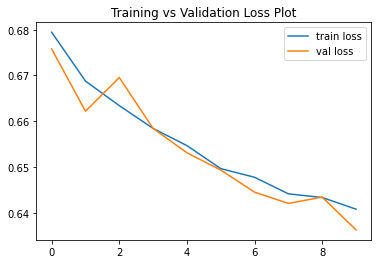

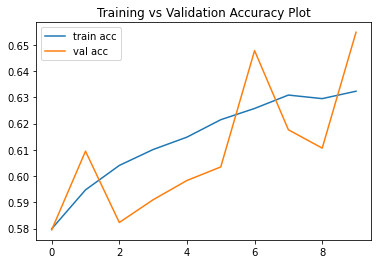

<Figure size 432x288 with 0 Axes>

In [16]:
import matplotlib.pyplot as plt

# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.title("Training vs Validation Loss Plot")
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title("Training vs Validation Accuracy Plot")
plt.show()
plt.savefig('AccVal_acc')

Model Saving on Google Drive

In [17]:
# save the model as a h5 file
from tensorflow.keras.models import load_model

model.save('/content/drive/MyDrive/XML_RoBERTa_Final')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/XML_RoBERTa_Final/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/XML_RoBERTa_Final/assets


Loading the Saved Model

In [18]:
from keras.models import load_model

loaded_model = load_model('/content/drive/MyDrive/XML_RoBERTa_Final')

Model Testing on unseen test data

In [19]:
y_pred_test = loaded_model.predict(x_test)

98/98 [==============================] - 17s 162ms/step


Observation of Predicted Results

In [20]:
y_pred_test

array([[0.5661049 ],
       [0.50247145],
       [0.60456705],
       ...,
       [0.50364894],
       [0.60313195],
       [0.46387532]], dtype=float32)

Use of Numpy functionality to convert float type metrics to 0's and 1's

In [21]:
import numpy as np

y_pred_test = np.where(y_pred_test > 0.5, 1, 0)

In [22]:
y_pred_test

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [0]])

Classification Report


In [23]:
from sklearn import metrics
cm_RF=metrics.confusion_matrix(y_test,y_pred_test)
print(metrics.classification_report(y_test,y_pred_test))
print(cm_RF)

              precision    recall  f1-score   support

           0       0.63      0.35      0.45      1225
           1       0.67      0.87      0.76      1888

    accuracy                           0.66      3113
   macro avg       0.65      0.61      0.60      3113
weighted avg       0.66      0.66      0.64      3113

[[ 431  794]
 [ 254 1634]]


Graphical Representation of Confusion Matrix

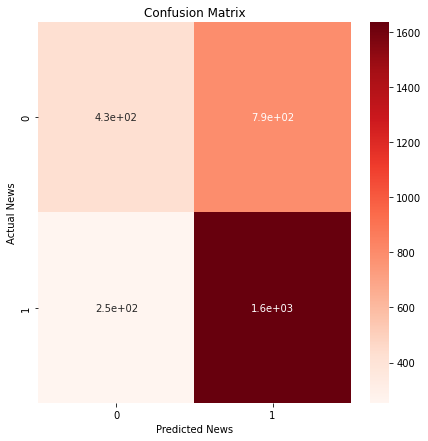

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

#Plotting the confusion matrix

plt.figure(figsize=(7,7))
sns.heatmap(cm_RF, annot=True,cmap="Reds")
plt.title('Confusion Matrix')
plt.ylabel('Actual News')
plt.xlabel('Predicted News')

plt.show()